# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Importing Dataset

In [2]:
df = pd.read_csv('creditcard.csv')

# Dataset Exploration

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df.mean()

Time      9.481386e+04
V1        3.919560e-15
V2        5.688174e-16
V3       -8.769071e-15
V4        2.782312e-15
V5       -1.552563e-15
V6        2.010663e-15
V7       -1.694249e-15
V8       -1.927028e-16
V9       -3.137024e-15
V10       1.768627e-15
V11       9.170318e-16
V12      -1.810658e-15
V13       1.693438e-15
V14       1.479045e-15
V15       3.482336e-15
V16       1.392007e-15
V17      -7.528491e-16
V18       4.328772e-16
V19       9.049732e-16
V20       5.085503e-16
V21       1.537294e-16
V22       7.959909e-16
V23       5.367590e-16
V24       4.458112e-15
V25       1.453003e-15
V26       1.699104e-15
V27      -3.660161e-16
V28      -1.206049e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64

In [8]:
df.std()

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

# Checking Null Values

In [9]:
null = df.isnull().sum()

In [10]:
null

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
percentage_null = df.isnull().sum()/len(df)

In [12]:
percentage_null

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

# Identifying Classes

In [13]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Data Visualisation

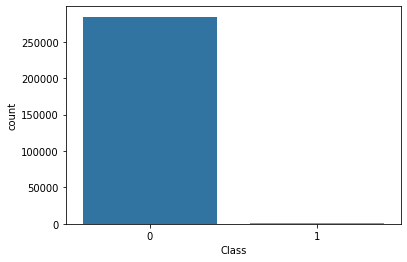

In [14]:
sns.countplot(df['Class'])

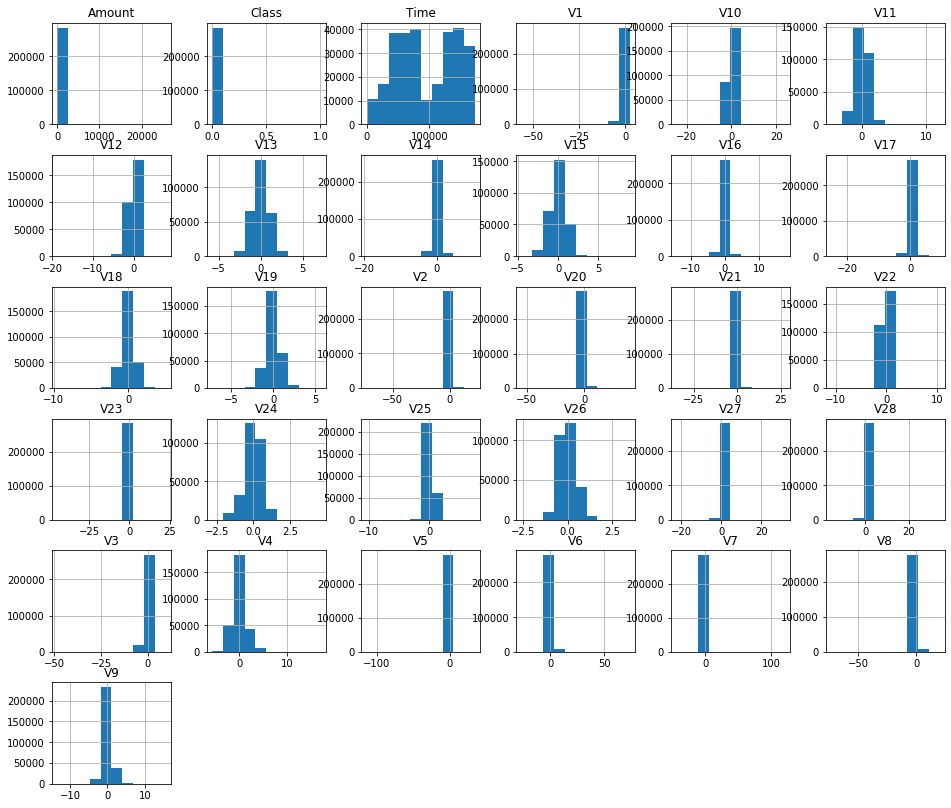

In [15]:

df.hist(figsize = (16,14))
plt.show()

# Machine Learning

In [16]:
X = df.drop(["Class"],axis=1)
y = df["Class"]

# Dividing Data into train and test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (227845, 30) (227845,)
Test set: (56962, 30) (56962,)


# Logistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predt = lr.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Accuracy Measurement- Confusion Matrix


In [19]:
lr_confusion_matrix = confusion_matrix(y_test,lr_predt )
lr_accuracy_score = accuracy_score(y_test, lr_predt)
print(lr_confusion_matrix)
print(lr_accuracy_score*100)

[[56853    11]
 [   46    52]]
99.89993328885924


Text(0.5, 1, 'Confusion Matrix')

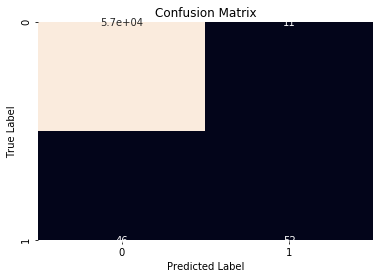

In [20]:
matrix = confusion_matrix(y_test, lr_predt)
sns.heatmap(matrix,annot=True,cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


# Classification Report

In [21]:
print(classification_report(y_test, lr_predt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.53      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



# Accuracy Measurement - (ROC-AUC)

In [22]:
auc_roc=metrics.roc_auc_score(y_test,lr_predt)
auc_roc

0.7652094004456033

In [23]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr_predt)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7652094004456033

# ROC Plot

Text(0.5, 0, 'False Positive Rate')

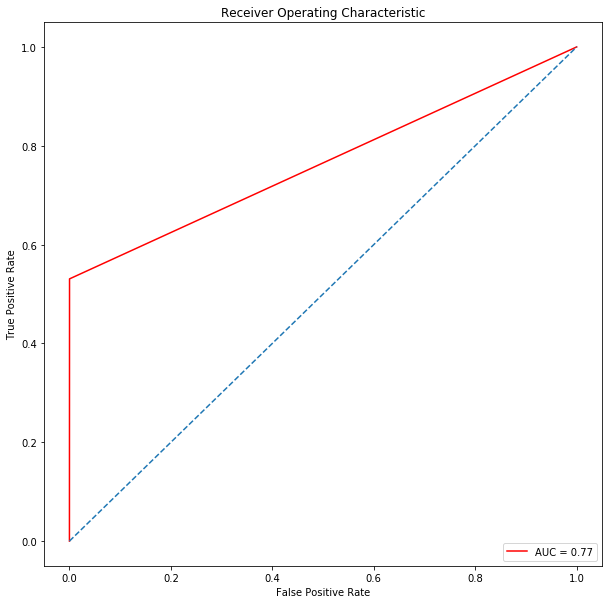

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [25]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, lr_predt)
print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.43877321836992766


# Precison-Recall Curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.44')

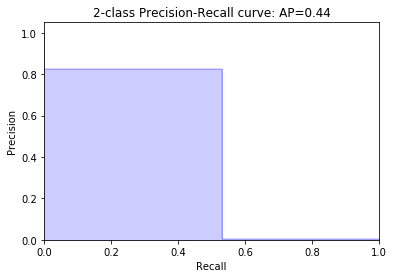

In [26]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, lr_predt)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Log-Loss Score

In [27]:
from sklearn.metrics import log_loss
score = log_loss(y_test, lr_predt)
print(score)

0.03456197201786626


# F1 - Score

In [28]:
from sklearn.metrics import f1_score, recall_score

In [29]:
f1_score(y_test, lr_predt)


0.6459627329192548

In [30]:
recall_score(y_test, lr_predt)


0.5306122448979592

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

# Confusion Matrix

In [32]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_acc_score = accuracy_score(y_test, rf_pred)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[56862     2]
 [   21    77]]
99.95962220427653


Text(0.5, 1, 'Confusion Matrix')

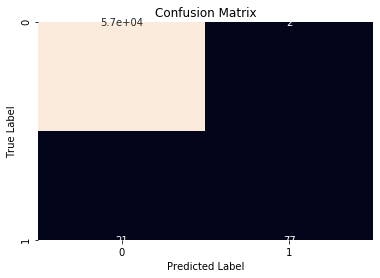

In [33]:
matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(matrix,annot=True,cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')



# Classification Report

In [34]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# ROC - AUC

In [35]:
auc_roc=metrics.roc_auc_score(y_test,rf_pred)
auc_roc

0.892839557038347

In [36]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.892839557038347

# ROC - AUC Curve

Text(0.5, 0, 'False Positive Rate')

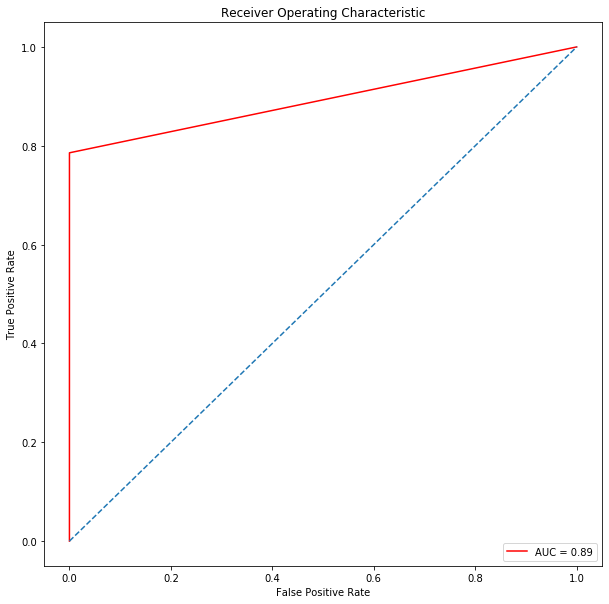

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Precision -Recall

In [38]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, rf_pred)
print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.7661914516406452


# Precision - Recall Curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.77')

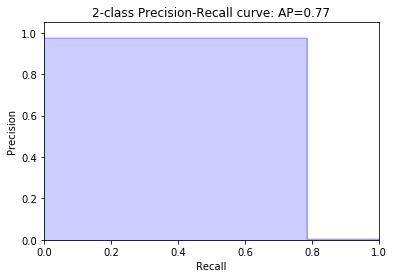

In [39]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, rf_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Log- Loss 

In [40]:
from sklearn.metrics import log_loss
score = log_loss(y_test, rf_pred)
print(score)

0.013946024652888994


# F1 - Score

In [41]:
f1_score(y_test, rf_pred)

0.8700564971751412

In [42]:
recall_score(y_test, rf_pred)

0.7857142857142857

# Decision Tree

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

# Confusion Matrix

In [44]:
dt_confusion_matrix = confusion_matrix(y_test,dt_pred )
dt_accuracy_score = accuracy_score(y_test, dt_pred)
print(dt_confusion_matrix)
print(dt_accuracy_score*100)

[[56829    35]
 [   19    79]]
99.90519995786666


Text(0.5, 1, 'Confusion Matrix')

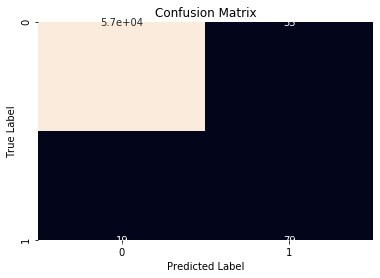

In [45]:
matrix = confusion_matrix(y_test, dt_pred)
sns.heatmap(matrix,annot=True,cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')



# Classification Report

In [46]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.81      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



# ROC- AUC

In [47]:
auc_roc=metrics.roc_auc_score(y_test,dt_pred)
auc_roc

0.9027534726608707

In [48]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9027534726608707

# ROC- AUC Curve

Text(0.5, 0, 'False Positive Rate')

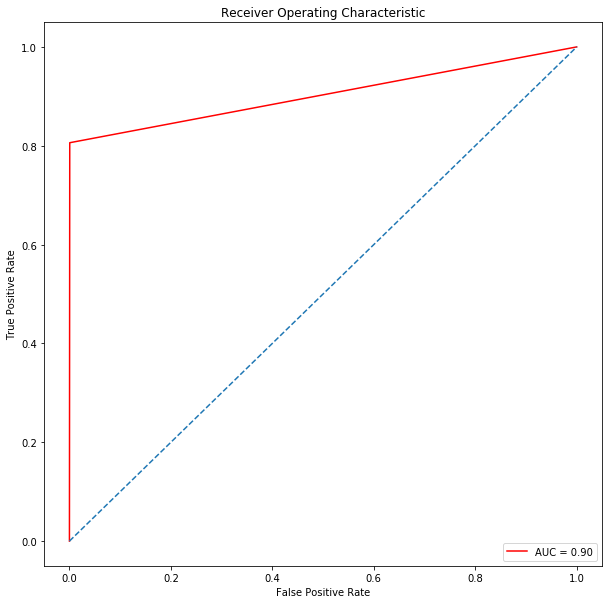

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Precision - Recall

In [50]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, dt_pred)
print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.5589622703475549


# Precision - Recall Curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.56')

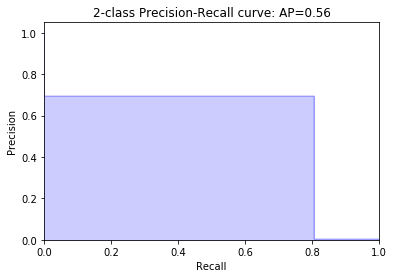

In [51]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, dt_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Log - Loss


In [52]:
from sklearn.metrics import log_loss
score = log_loss(y_test, dt_pred)
print(score)

0.03274326588313771


# F1 - Score

In [53]:
f1_score(y_test, dt_pred)

0.7452830188679246

In [54]:
recall_score(y_test, dt_pred)

0.8061224489795918

In [57]:
Data = {'Logistic Regression':  ['0.998', '0.765','0.438','0.034','0.64','0.53'],
        'Decision Tree': ['0.9992','0.9131','0.614','0.027','0.782','0.826'],
         'Random Forest':['0.9995','0.892','0.766','0.013','0.87','0.785'],
         'Metrics'      :["Confusion Matrix","Roc_Auc","Precision-Recall","Log-Loss","F1-Score","Recall_Score"]}

tab = pd.DataFrame (Data, columns = ['Logistic Regression','Decision Tree','Random Forest','Metrics'])
tab.set_index("Metrics",inplace = True)
tab

,Logistic Regression,Decision Tree,Random Forest
Metrics,,,
Confusion Matrix,0.998,0.9992,0.9995
Roc_Auc,0.765,0.9131,0.892
Precision-Recall,0.438,0.614,0.766
Log-Loss,0.034,0.027,0.013
F1-Score,0.64,0.782,0.87
Recall_Score,0.53,0.826,0.785
